# 1. Problem Statement
To build a classification model from the data collected by a healthcare organization together with a couple of government hospitals about the vitals that would reveal if the person might have a coronary heart disease in the next ten years or not. This model will be helpful in early identification of disease , improving the health conditions and the economy.

### Importing the required libraries 

In [1]:
# for manipulating data
import pandas as pd
import numpy as np
from collections import Counter

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for the model
from sklearn.model_selection import train_test_split

# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# for Q-Q plots
import scipy.stats as stats

# for missing data imputation and outlier removal
from feature_engine import missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

#Importing the model to be used
from sklearn.ensemble import RandomForestClassifier

#Importing metrics libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2. Exploratory data analysis

In [2]:
# load dataset
data = pd.read_csv('data_files/Problem2_Data.csv')
#Drop the ID column in the dataset. We wont require it further for our analysis.
data = data.drop('ID', axis=1)
# Printing the shape of the data and the top 5 rows
print(data.shape)
data.head()

(34281, 24)


,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,2049,44,8.0,11,0,0,0,0,38,123,...,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,48,0,8.0,0,0,0,0,0,1,1,...,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,318,2,9.0,0,0,0,0,0,0,1,...,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,62,4,2.0,0,0,0,15,30,7,24,...,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2,0,8.0,0,0,0,0,1,0,0,...,0,0.82,0.81,0,0,0,1,17.072697,0,0


In [3]:
# feature magnitude
data.describe()

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
count,34281.000000,34281.000000,32538.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,...,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000
mean,236.252005,36.126367,7.355185,22.543071,1.695371,151.959044,274.418453,387.933637,36.482746,132.947551,...,1.744757,-5.742893,-5.368822,0.208658,0.000321,0.131939,0.962370,17.049826,0.000204,0.329424
std,3326.574620,427.707021,6.165307,359.486291,36.195759,2274.087109,4065.441226,5443.804648,375.931751,4151.795360,...,26.077507,24.618128,23.938095,0.406355,0.017910,0.338429,0.190303,0.028818,0.014288,0.470011
min,-2999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,17.000005,0.000000,0.000000
25%,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.590000,0.610000,0.000000,0.000000,0.000000,1.000000,17.024869,0.000000,0.000000
50%,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,3.000000,...,0.000000,0.810000,0.790000,0.000000,0.000000,0.000000,1.000000,17.049813,0.000000,0.000000
75%,40.000000,4.000000,8.000000,0.000000,0.000000,18.000000,33.000000,48.000000,6.000000,19.000000,...,0.000000,0.960000,0.940000,0.000000,0.000000,0.000000,1.000000,17.074796,0.000000,1.000000
max,366924.000000,50547.000000,52.000000,31750.000000,2999.000000,260660.000000,438020.000000,533540.000000,21071.000000,742110.000000,...,1488.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.099995,1.000000,1.000000


### Types of variables

In [4]:
# let's inspect the type of variables in pandas
data.dtypes

IV          int64
A1          int64
A2        float64
A3          int64
A4          int64
A5          int64
A6          int64
A7          int64
A8          int64
A9          int64
A10         int64
A11         int64
A12         int64
A13         int64
A14         int64
A15       float64
A16       float64
A17         int64
A18         int64
A19         int64
A20         int64
A21       float64
A22         int64
Target      int64
dtype: object

In [5]:
# let's inspect the variable values, printing first 20 unique values
for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

IV [2049   48  318   62    2 6648   10   22  160    8   87  183   70   54
   14 4995   20    1   13    3] 

A1 [  44    0    2    4 2327    3   43   64   19    1    6   82   70    8
  501  188   12   95   63  244] 

A2 [ 8.  9.  2.  6. 12. 17. nan  4. 16.  5. 10.  3. 52. 14. 15. 20.  0. 13.
 11. 26.] 

A3 [  11    0 1404    1   13    2   94   53  168   30  336   99   65   14
   21  110   69   10    3   55] 

A4 [  0  18  97 354   1   2   5  20   9   4   3  12   7  43  17   8   6  80
  42 447] 

A5 [    0 11604     3  1250     6   240   174  1260    10    54     1  1578
   180   493     9    48    34     2    80   100] 

A6 [    0    15 23532    12   120  1250    48     1    10     2   480   398
  2268   127     3  2418   468     7   925    18] 

A7 [    0    30     1 35880    21     3   180    29  1250    48    15     2
   720   622  2928    10   189     5  3258   804] 

A8 [   38     1     0     7 10516     3     5    15     4     2    84    53
   638   139   591    65   137    55    

### Discrete and Continuous variables

In [6]:
# numerical: discrete vs continuous
# segregating the data between discrete and continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Target' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Target' and var not in discrete]

print('There are {} discrete variables : {}'.format(len(discrete), discrete))
print('There are {} continuous variables {}'.format(len(continuous), continuous))

There are 7 discrete variables : ['A11', 'A13', 'A17', 'A18', 'A19', 'A20', 'A22']
There are 16 continuous variables ['IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A12', 'A14', 'A15', 'A16', 'A21']


In [7]:
# understanding the imbalance of all cardinal values of the discrete variables
for col in discrete:
    print(col, Counter(data[col]))

A11 Counter({27: 34281})
A13 Counter({0: 34218, 1: 63})
A17 Counter({0: 27128, 1: 7153})
A18 Counter({0: 34270, 1: 11})
A19 Counter({0: 29758, 1: 4523})
A20 Counter({1: 32991, 0: 1290})
A22 Counter({0: 34274, 1: 7})


### Imbalance in the target variable

In [8]:
# Calculating the imbalance in the target variables
counterObject = Counter(data['Target'])
print(round(counterObject[1]/(counterObject[0]+counterObject[1]),3))

0.329


### Missing values identification

In [9]:
# Identifying the proportion of missing data
data.isnull().mean()

IV        0.000000
A1        0.000000
A2        0.050844
A3        0.000000
A4        0.000000
A5        0.000000
A6        0.000000
A7        0.000000
A8        0.000000
A9        0.000000
A10       0.000000
A11       0.000000
A12       0.000000
A13       0.000000
A14       0.000000
A15       0.000000
A16       0.000000
A17       0.000000
A18       0.000000
A19       0.000000
A20       0.000000
A21       0.000000
A22       0.000000
Target    0.000000
dtype: float64

# 3. Selecting training and test data 
This step is done before data pre-processing steps like: missing value imputation, normalization, dummy value creation etc so that these steps do not use the test data.

In [10]:
# separate into training and testing set to make
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Target', axis=1),  # predictors
    data['Target'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0 , 
    stratify = data['Target'])  # seed to ensure reproducibility

X_train.shape, X_test.shape

((27424, 23), (6857, 23))

In [11]:
X_train_copy = X_train.copy(deep=True)

# 4. Preprocess the data
Missing value imputation, outlier removal and normalization

### Missing data imputation

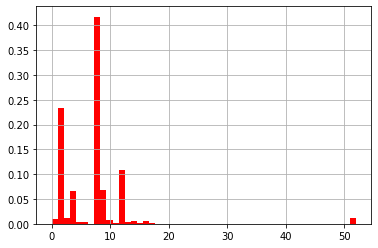

In [12]:
## let's check the distribution of a few variables before and after 
# cca: histogram

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
X_train['A2'].hist(bins=50, ax=ax, density=True, color='red')

In [13]:
# we call the imputer from feature-engine
# we specify the imputation strategy, median in this case
cols_to_use = ['A2']
imputer = mdi.MeanMedianImputer(imputation_method='median', variables=cols_to_use)

In [14]:
# we fit the imputer
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [15]:
#Check that no values are missing in A2 after median imputation in both train and test.
X_train['A2'].isnull().mean() , X_test['A2'].isnull().mean()

(0.0, 0.0)

In [16]:
# here we can see the mean assigned to each variable
imputer.imputer_dict_

{'A2': 8.0}

In [17]:
# feature-engine returns a dataframe
X_train_copy['A2'].isnull().mean()

0.052144107351225204

In [18]:
# Now training has no more missing values
X_train['A2'].isnull().mean()

0.0

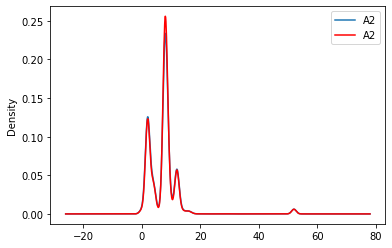

In [19]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train_copy['A2'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['A2'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned above, the mean / median imputation doesn't distorts the original distribution of the variable A2. As variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

In [20]:
# we can see a change in the variance after mean / median imputation
# this is expected, because the percentage of missing data is quite
# low in A2, ~5%

print('Original variable variance: ', X_train_copy['A2'].var())
print('Variance after median imputation: ', X_train['A2'].var())

Original variable variance:  37.24683953904694
Variance after median imputation:  35.32639043800031


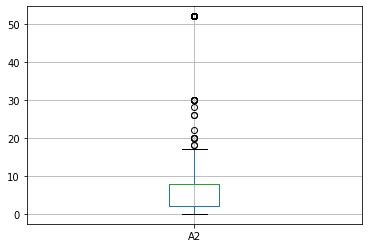

In [21]:
# outliers in A2 before median imputation 
X_train_copy[['A2']].boxplot()

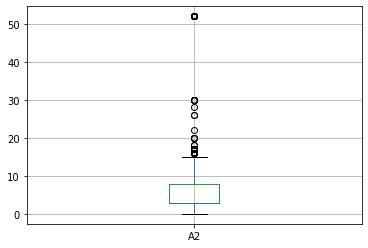

In [22]:
# outliers in A2 after median imputation 
X_train[['A2']].boxplot()

From the boxplot above, we can see that after the imputation we have few more outliers on the higher A2 values.

### Outlier identification

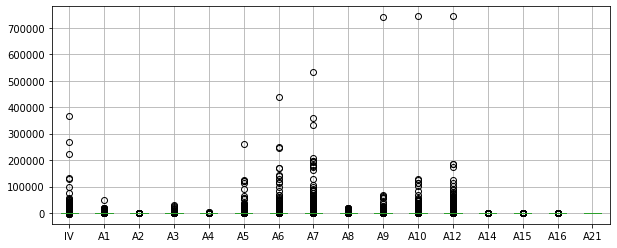

In [23]:
# outliers
data[continuous].boxplot(figsize=(10,4))

In [24]:
# function to create histogram, Q-Q plot and
# boxplot. 
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30, color='red')
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable], color = 'yellow')
    plt.title('Boxplot')

    plt.show()

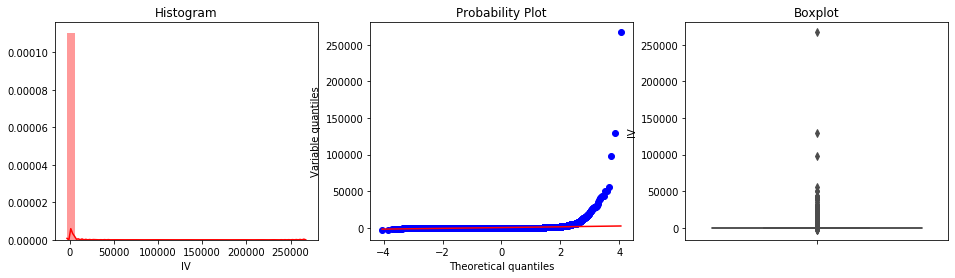

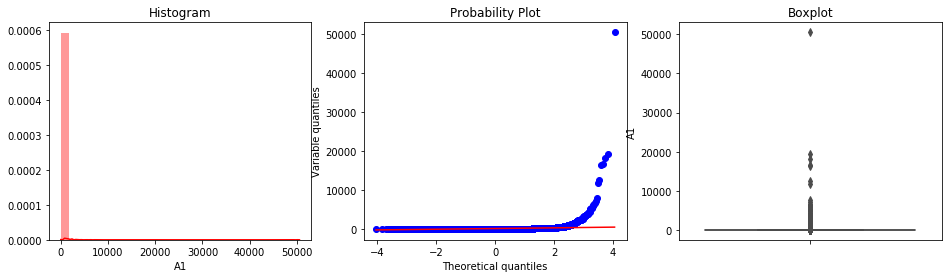

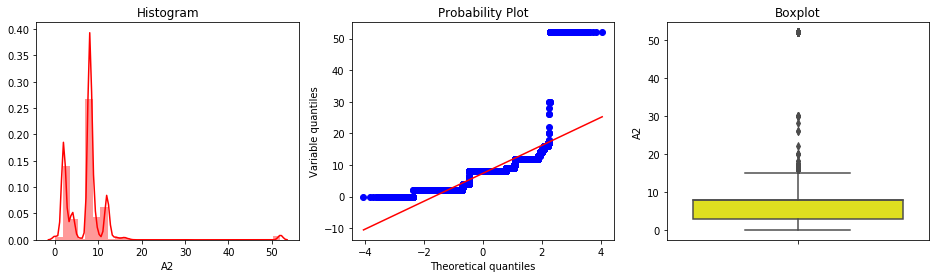

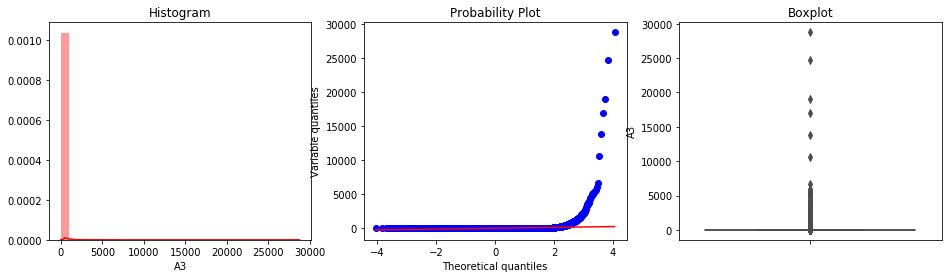

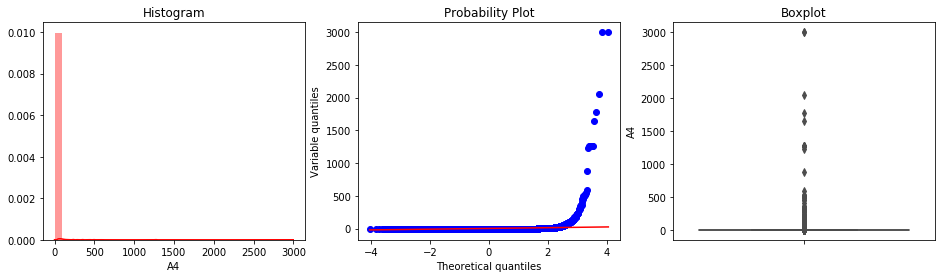

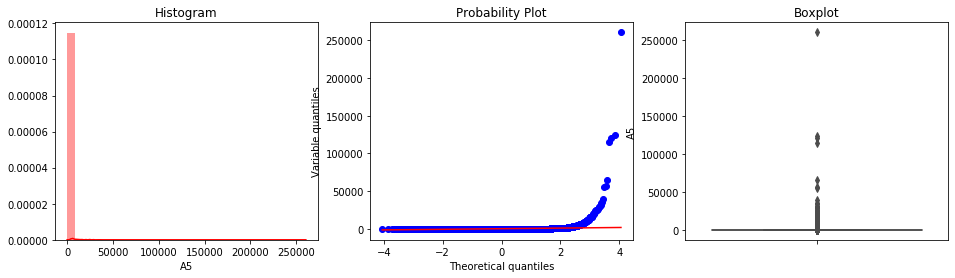

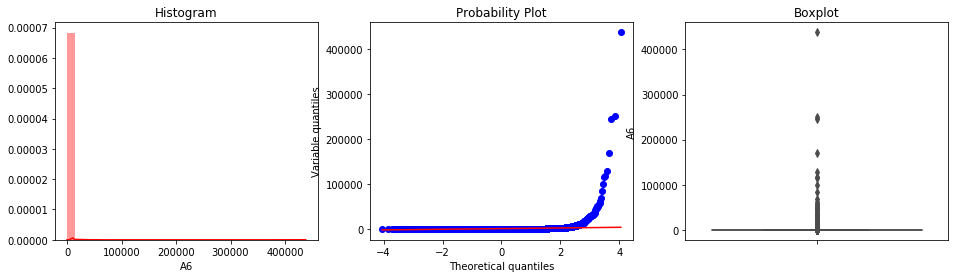

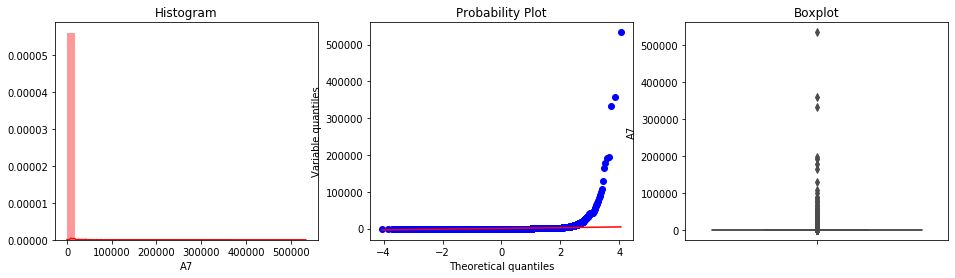

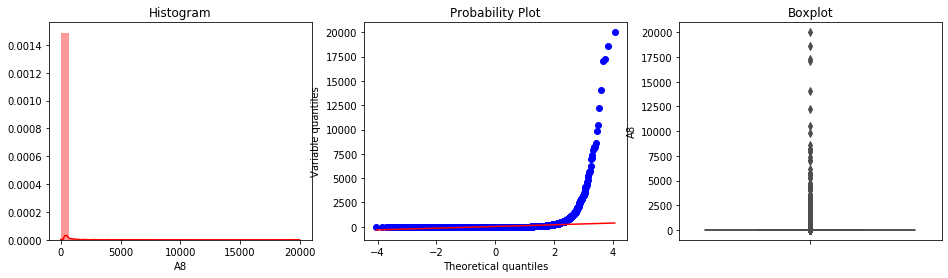

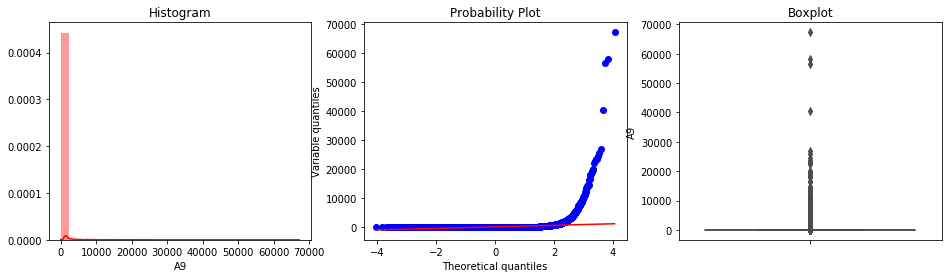

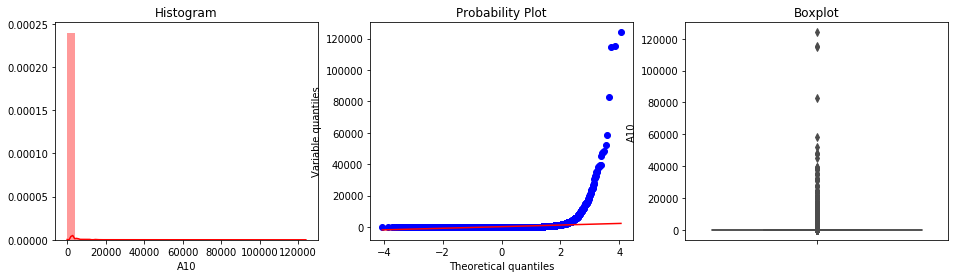

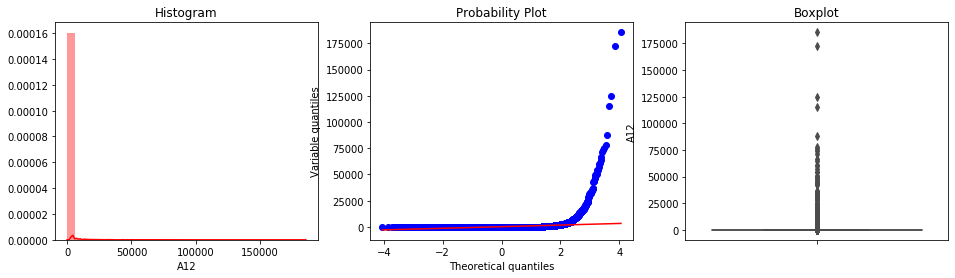

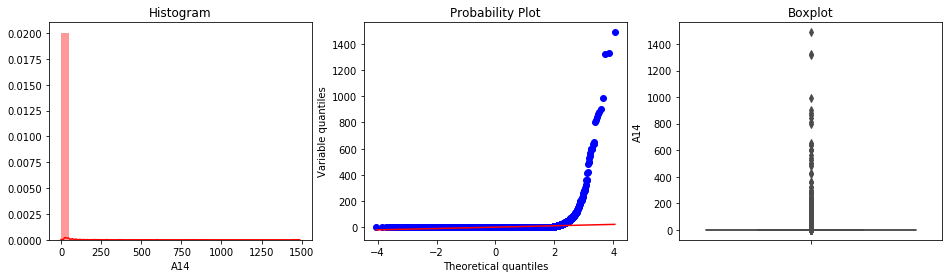

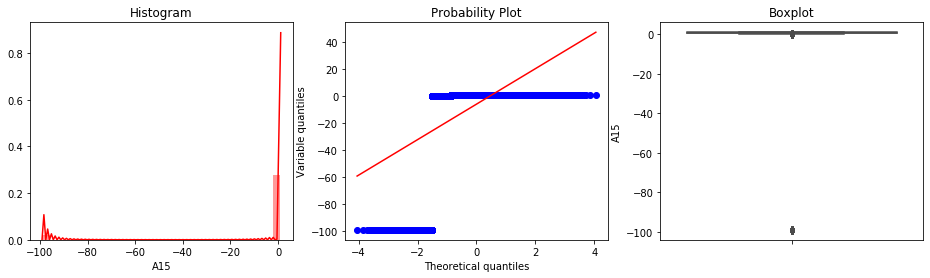

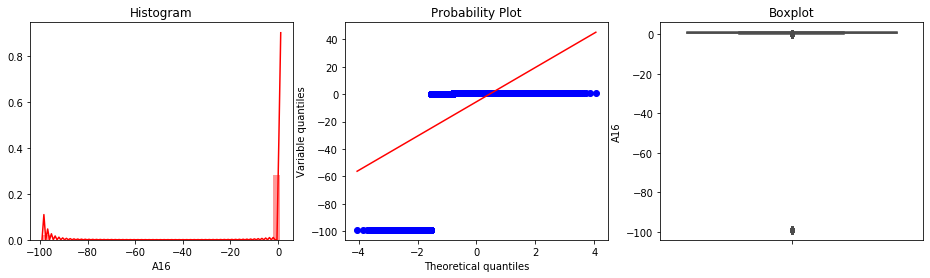

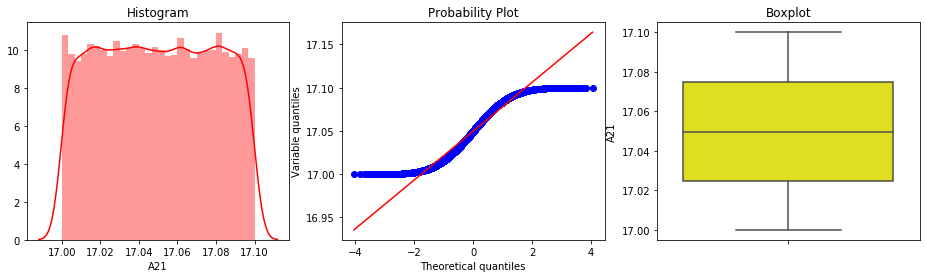

In [25]:
# let's find outliers 
for column in continuous:
    diagnostic_plots(X_train, column)


### Outlier removal

In [26]:
X_test['A2'].isnull().mean()

0.0

In [27]:
# create the capper
# For outlier removal , the columns A1, A3-14 cap the outliers at the right tail and the distribution type is quantile.
right_tail_columns = ['A1',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A12',
 'A14']

windsoriser = Winsorizer(distribution='quantiles', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='right', # cap left, right or both tails 
                          fold=1.5,
                          variables=right_tail_columns)

X_train = windsoriser.fit_transform(X_train)

In [28]:
# create the capper
# For outlier removal , the columns A1, A3-14 cap the outliers at the right tail and the distribution type is quantile.
both_tail_skewed_columns = ['IV',
 'A2',
 'A15',
 'A16',
 'A21']

windsoriser = Winsorizer(distribution='skewed', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=both_tail_skewed_columns)

X_train = windsoriser.fit_transform(X_train)

In [29]:
X_train.describe()

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22
count,27424.000000,27424.000000,27424.000000,27424.000000,27424.0,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000,...,27424.000000,27424.0,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000
mean,26.732935,11.657307,6.933744,3.365300,0.0,39.668064,67.117671,95.620413,10.908438,34.160845,...,0.001823,0.0,0.708644,0.714763,0.207957,0.000292,0.131454,0.961968,17.049858,0.000255
std,37.028798,27.726320,3.524792,10.139717,0.0,96.478787,158.075393,225.566950,25.040076,77.639520,...,0.042661,0.0,0.307042,0.280002,0.405853,0.017077,0.337903,0.191278,0.028835,0.015975
min,-56.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.035000,0.115000,0.000000,0.000000,0.000000,0.000000,17.000005,0.000000
25%,2.000000,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.590000,0.610000,0.000000,0.000000,0.000000,1.000000,17.024999,0.000000
50%,8.000000,0.000000,8.000000,0.000000,0.0,0.000000,2.000000,4.000000,1.000000,3.000000,...,0.000000,0.0,0.810000,0.790000,0.000000,0.000000,0.000000,1.000000,17.049732,0.000000
75%,41.000000,4.000000,8.000000,0.000000,0.0,18.000000,32.000000,48.000000,6.000000,19.000000,...,0.000000,0.0,0.960000,0.940000,0.000000,0.000000,0.000000,1.000000,17.074904,0.000000
max,99.500000,110.000000,15.500000,42.000000,0.0,390.000000,631.000000,909.100000,101.000000,312.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.099995,1.000000


### Removing highly correlated variables
This is done to remove the variable which are highly correlated with each other

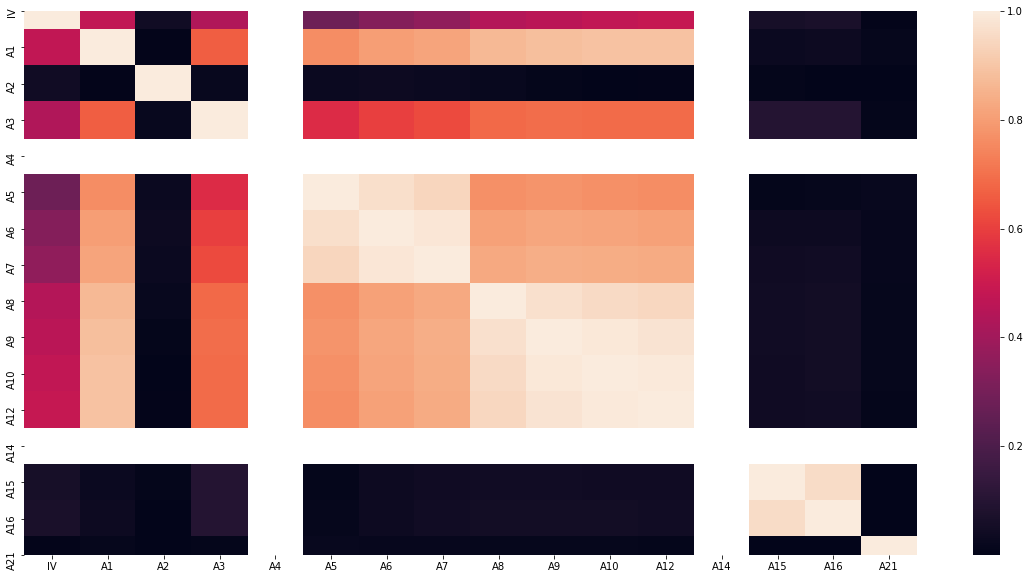

In [30]:
# plot the heatmap
cor = X_train[continuous].corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns)

In [31]:
corrThreshold = 0.90
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > corrThreshold)]
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)
print('Variables removed: ', to_drop)

Variables removed:  ['A6', 'A7', 'A9', 'A10', 'A12', 'A16']


### Normalization

In [32]:
# standardisation: with the StandardScaler from sklearn
# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [33]:
np.round(X_train_scaled.describe(), 1)

,IV,A1,A2,A3,A4,A5,A8,A11,A13,A14,A15,A17,A18,A19,A20,A21,A22
count,27424.0,27424.0,27424.0,27424.0,27424.0,27424.0,27424.0,27424.0,27424.0,27424.0,27424.0,27424.0,27424.0,27424.0,27424.0,27424.0,27424.0
mean,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.2,-0.4,-2.0,-0.3,0.0,-0.4,-0.4,0.0,-0.0,0.0,-2.2,-0.5,-0.0,-0.4,-5.0,-1.7,-0.0
25%,-0.7,-0.4,-1.1,-0.3,0.0,-0.4,-0.4,0.0,-0.0,0.0,-0.4,-0.5,-0.0,-0.4,0.2,-0.9,-0.0
50%,-0.5,-0.4,0.3,-0.3,0.0,-0.4,-0.4,0.0,-0.0,0.0,0.3,-0.5,-0.0,-0.4,0.2,-0.0,-0.0
75%,0.4,-0.3,0.3,-0.3,0.0,-0.2,-0.2,0.0,-0.0,0.0,0.8,-0.5,-0.0,-0.4,0.2,0.9,-0.0
max,2.0,3.5,2.4,3.8,0.0,3.6,3.6,0.0,23.4,0.0,0.9,2.0,58.5,2.6,0.2,1.7,62.6


As expected, the mean of each variable, which were not centered at zero, is now around zero and the standard deviation is set to 1. 

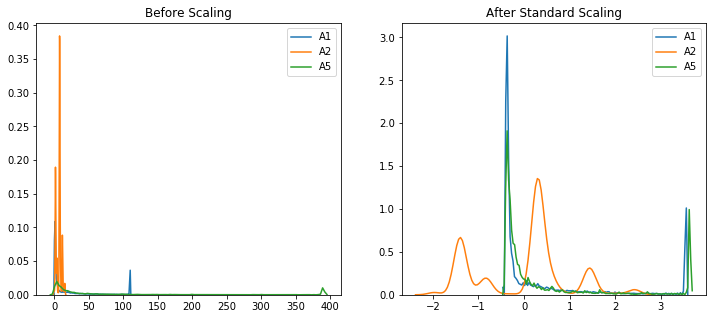

In [34]:
# let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['A1'], ax=ax1)
sns.kdeplot(X_train['A2'], ax=ax1)
sns.kdeplot(X_train['A5'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['A1'], ax=ax2)
sns.kdeplot(X_train_scaled['A2'], ax=ax2)
sns.kdeplot(X_train_scaled['A5'], ax=ax2)
plt.show()

In the above plots standardisation centered all the distributions at zero, but it preserved their original distribution. The value range is not identical, but it looks more homogeneous across the variables.

## 5. Train the model 

In [35]:
#Declaring the model the default parameter set
clf = RandomForestClassifier()

In [36]:
#Fitting the model on our data
clf.fit(X_train, y_train)

E:\Programs\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# 5. Test the model (Predictions and reporting)

In [37]:
#Predicting on the test set
y_pred = clf.predict(X_test)

# 6. Evaluation of model performance

In [38]:
#Calculating the accuracy
sum(y_pred == y_test)/len(y_pred)

0.8826017208691848

In [39]:
# Extracting the classification report and confusion matrix
print(classification_report(y_test,y_pred ))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4598
           1       0.84      0.80      0.82      2259

    accuracy                           0.88      6857
   macro avg       0.87      0.86      0.87      6857
weighted avg       0.88      0.88      0.88      6857

[[4244  354]
 [ 451 1808]]


# 7. Evaluation of model performance

Our current model used - Random Forest has an accuracy (TP+TN)/(TP+FP+TN+FN) of 89.38 percent
The F-Score for class 1 = 0.84 which is pretty good, considering we have no derived features right now.

# 8. Suggest ways of improving the model

An intuition about the attributes and their descriptions could help us to identify which attributes will have direct correlation with the target variable. We could also derive more features from the given variables if we know the descriptions about the provided variables.

# 9. Any interesting observations

A. Only A2 has 5.08 percent of NAs in the data. Rest of the variables do not have any missing values. The missing values are treated by median imputation.

B. 6 variables were highly correlated.

C. Outlier removal - After looking at the diagonostic plots in the EDA section , the variables ['A1', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A12', 'A14'] are treated for outliers by the IQR method . The outliers are removed on the right tail.
The variables ['IV', 'A2', 'A15', 'A16', 'A21'] are treated for outliers on both the tails .

# 10. Challenges faced and how you mitigated the challenges
We found out that certain variables are highly correlated and are not improving the model performance by a significant amount. We removed those variables - ['A6', 'A7', 'A9', 'A10', 'A12', 'A16']

# 11. Assumptions if any
We have assumed that variables with less than 10 cardinality are discrete variables and above 10 are continuous variables since the variables are masked and they dont have any business meaning here.